In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
%matplotlib inline 

In [2]:
df=pd.read_csv('YourCabs.csv')


In [3]:
# · vehicle_model_id
# · package_id
# · travel_type_id
# . from_area_id
# · to_area_id
# . from_city_id
# · to_city_id
# . days_before_booking
# . online_booking
# . mobile_site_booking
# . from_month
# . from_weekday
# . booking_month
# · booking_weekday

In [4]:
columns_to_drop=['id','user_id','from_lat','from_long','to_lat','to_long']

In [5]:
df.drop(columns_to_drop,axis=1,inplace=True)

In [6]:
df.fillna(0,inplace=True)

In [7]:
# checing the correlation between car cancellation and the mode of booking 
pd.pivot_table(df,values='Car_Cancellation',index=['online_booking', 'mobile_site_booking',],aggfunc=np.count_nonzero)

Car_Cancellation
online_booking mobile_site_booking                  
0              0                                 940
               1                                 289
1              0                                1903

In [8]:
# df.drop(['booking_weekday','booking_month','from_month','from_weekday','booking_created']
df


,vehicle_model_id,package_id,travel_type_id,from_area_id,to_area_id,from_city_id,to_city_id,from_date,online_booking,mobile_site_booking,booking_created,Car_Cancellation
0,28,0.0,2,83.0,448.0,0.0,0.0,01-01-2013 02:00,0,0,01-01-2013 01:39,0
1,12,0.0,2,1010.0,540.0,0.0,0.0,01-01-2013 09:00,0,0,01-01-2013 02:25,0
2,12,0.0,2,1301.0,1034.0,0.0,0.0,01-01-2013 03:30,0,0,01-01-2013 03:08,0
3,12,0.0,2,768.0,398.0,0.0,0.0,01-01-2013 05:45,0,0,01-01-2013 04:39,0
4,12,0.0,2,1365.0,849.0,0.0,0.0,01-01-2013 09:00,0,0,01-01-2013 07:53,0
...,...,...,...,...,...,...,...,...,...,...,...,...
43426,12,0.0,2,1147.0,452.0,15.0,0.0,11/24/2013 18:00,1,0,11/24/2013 14:25,0
43427,12,0.0,2,393.0,466.0,15.0,0.0,11/26/2013 1:00,1,0,11/24/2013 14:30,0
43428,12,1.0,3,974.0,0.0,15.0,0.0,11/24/2013 18:30,0,0,11/24/2013 14:35,0
43429,87,0.0,2,1263.0,542.0,15.0,0.0,11/24/2013 16:00,0,0,11/24/2013 14:43,0


In [9]:
# Reapply the function to standardize the date formats
def standardize_date_format(date_str):
    try:
        return pd.to_datetime(date_str, format='%d-%m-%Y %H:%M')
    except ValueError:
        try:
            return pd.to_datetime(date_str)
        except ValueError:
            return pd.NaT

# Apply the function to standardize the date formats
df['from_date'] = df['from_date'].apply(standardize_date_format)
df['booking_created'] = df['booking_created'].apply(standardize_date_format)

# Step 3: Check for any remaining null values after conversion
null_from_date_after = df['from_date'].isnull().sum()
null_booking_created_after = df['booking_created'].isnull().sum()

# Display the count of null values after conversion
null_from_date_after, null_booking_created_after


(0, 0)

In [10]:
df.booking_created=pd.to_datetime(df.booking_created,errors='coerce')
df['booking_created_weekday']=df.booking_created.dt.weekday
df['booking_created_month']=df.booking_created.dt.month
df['from_date_weekday']=df.from_date.dt.weekday
df['from_date_month']=df.from_date.dt.month
df.drop(['booking_created','from_date'],axis=1,inplace=True)

# checking for outliers

In [1]:
df.tail(50)

NameError: name 'df' is not defined

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13]),
 [Text(0, 0, 'vehicle_model_id'),
  Text(1, 0, 'package_id'),
  Text(2, 0, 'travel_type_id'),
  Text(3, 0, 'from_area_id'),
  Text(4, 0, 'to_area_id'),
  Text(5, 0, 'from_city_id'),
  Text(6, 0, 'to_city_id'),
  Text(7, 0, 'online_booking'),
  Text(8, 0, 'mobile_site_booking'),
  Text(9, 0, 'Car_Cancellation'),
  Text(10, 0, 'booking_created_weekday'),
  Text(11, 0, 'booking_created_month'),
  Text(12, 0, 'from_date_weekday'),
  Text(13, 0, 'from_date_month')])

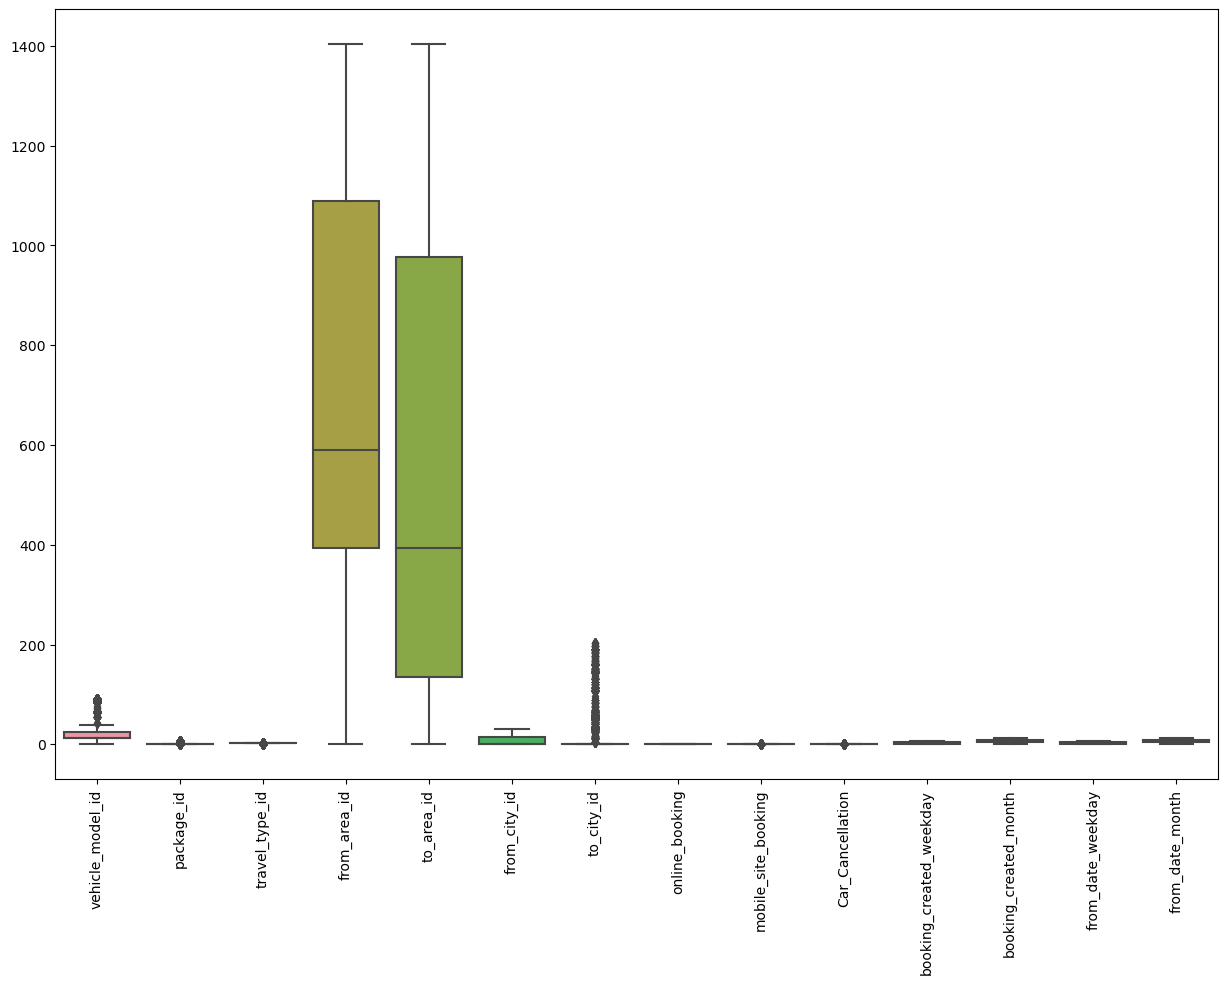

In [12]:
import seaborn as sns 
plt.figure(figsize=(15,10))
sns.boxplot(df)
plt.xticks(rotation=90)

# Splitting the data 

In [36]:
# dividing the features class and target class 
x=df.iloc[:,df.columns!='Car_Cancellation']
y=df.iloc[:,9:10]
# Splitting the data into training and testing sets using Train test split function 
from sklearn.model_selection import train_test_split
xTrain,xTest,yTrain,yTest=train_test_split(x,y,train_size=0.7,random_state=23)

# LazyPredict

In [41]:
# using lazypredict to find the best classification model
from lazypredict.Supervised import LazyClassifier
lazy=LazyClassifier(verbose=1,ignore_warnings=True,custom_metric=None)
models,predictions=lazy.fit(xTrain,xTest,yTrain,yTest)
print(models)


  3%|▎         | 1/29 [00:01<00:32,  1.17s/it]

{'Model': 'AdaBoostClassifier', 'Accuracy': 0.9267075978511128, 'Balanced Accuracy': 0.502664574710797, 'ROC AUC': 0.5026645747107968, 'F1 Score': 0.8927853280506916, 'Time taken': 1.173893690109253}


 10%|█         | 3/29 [00:02<00:18,  1.38it/s]

{'Model': 'BaggingClassifier', 'Accuracy': 0.923561013046815, 'Balanced Accuracy': 0.5854417525398676, 'ROC AUC': 0.5854417525398676, 'F1 Score': 0.9091230166186399, 'Time taken': 1.2708415985107422}
{'Model': 'BernoulliNB', 'Accuracy': 0.927168073676132, 'Balanced Accuracy': 0.5, 'ROC AUC': 0.5, 'F1 Score': 0.8921283499726296, 'Time taken': 0.11682963371276855}



 14%|█▍        | 4/29 [00:03<00:15,  1.58it/s]

{'Model': 'CalibratedClassifierCV', 'Accuracy': 0.927168073676132, 'Balanced Accuracy': 0.5, 'ROC AUC': 0.5, 'F1 Score': 0.8921283499726296, 'Time taken': 0.4976933002471924}



 21%|██        | 6/29 [00:03<00:08,  2.68it/s]

{'Model': 'DecisionTreeClassifier', 'Accuracy': 0.8905602455871067, 'Balanced Accuracy': 0.6176499705317173, 'ROC AUC': 0.6176499705317174, 'F1 Score': 0.892928694471261, 'Time taken': 0.22687840461730957}
{'Model': 'DummyClassifier', 'Accuracy': 0.927168073676132, 'Balanced Accuracy': 0.5, 'ROC AUC': 0.5, 'F1 Score': 0.8921283499726296, 'Time taken': 0.09999370574951172}



 28%|██▊       | 8/29 [00:03<00:05,  3.83it/s]

{'Model': 'ExtraTreeClassifier', 'Accuracy': 0.8993860322333077, 'Balanced Accuracy': 0.6180401625173388, 'ROC AUC': 0.6180401625173388, 'F1 Score': 0.8984117108515219, 'Time taken': 0.1255650520324707}



 31%|███       | 9/29 [00:07<00:21,  1.10s/it]

{'Model': 'ExtraTreesClassifier', 'Accuracy': 0.9226400613967767, 'Balanced Accuracy': 0.5956257328365462, 'ROC AUC': 0.5956257328365462, 'F1 Score': 0.9100893779548654, 'Time taken': 3.8040623664855957}
{'Model': 'GaussianNB', 'Accuracy': 0.8620107444359171, 'Balanced Accuracy': 0.5949716477353557, 'ROC AUC': 0.5949716477353557, 'F1 Score': 0.8736313237019437, 'Time taken': 0.09514570236206055}



 38%|███▊      | 11/29 [00:12<00:30,  1.71s/it]

{'Model': 'KNeighborsClassifier', 'Accuracy': 0.9204144282425173, 'Balanced Accuracy': 0.5570433033295016, 'ROC AUC': 0.5570433033295016, 'F1 Score': 0.9025043508611218, 'Time taken': 5.142075538635254}


 48%|████▊     | 14/29 [03:19<07:09, 28.63s/it]

{'Model': 'LinearDiscriminantAnalysis', 'Accuracy': 0.927168073676132, 'Balanced Accuracy': 0.5, 'ROC AUC': 0.5, 'F1 Score': 0.8921283499726296, 'Time taken': 0.4438307285308838}


 55%|█████▌    | 16/29 [03:24<03:30, 16.19s/it]

{'Model': 'LinearSVC', 'Accuracy': 0.927168073676132, 'Balanced Accuracy': 0.5, 'ROC AUC': 0.5, 'F1 Score': 0.8921283499726296, 'Time taken': 5.117463111877441}
{'Model': 'LogisticRegression', 'Accuracy': 0.927168073676132, 'Balanced Accuracy': 0.5, 'ROC AUC': 0.5, 'F1 Score': 0.8921283499726296, 'Time taken': 0.18827438354492188}


 66%|██████▌   | 19/29 [03:24<01:04,  6.47s/it]

{'Model': 'NearestCentroid', 'Accuracy': 0.6374520337682271, 'Balanced Accuracy': 0.6413640661746767, 'ROC AUC': 0.6413640661746767, 'F1 Score': 0.7243759193131226, 'Time taken': 0.10350966453552246}
{'Model': 'PassiveAggressiveClassifier', 'Accuracy': 0.8642363775901765, 'Balanced Accuracy': 0.48548173555232077, 'ROC AUC': 0.4854817355523207, 'F1 Score': 0.8625748387193338, 'Time taken': 0.11935615539550781}


 72%|███████▏  | 21/29 [03:25<00:29,  3.69s/it]

{'Model': 'Perceptron', 'Accuracy': 0.9038372985418266, 'Balanced Accuracy': 0.48936019242784196, 'ROC AUC': 0.48936019242784196, 'F1 Score': 0.8807838237219653, 'Time taken': 0.10544705390930176}
{'Model': 'QuadraticDiscriminantAnalysis', 'Accuracy': 0.869071373752878, 'Balanced Accuracy': 0.5861567192786938, 'ROC AUC': 0.586156719278694, 'F1 Score': 0.8769991285833141, 'Time taken': 0.11483049392700195}


 79%|███████▉  | 23/29 [03:29<00:17,  2.84s/it]

{'Model': 'RandomForestClassifier', 'Accuracy': 0.9274750575594781, 'Balanced Accuracy': 0.5860960556984994, 'ROC AUC': 0.5860960556984994, 'F1 Score': 0.9116307990808445, 'Time taken': 4.349426507949829}
{'Model': 'RidgeClassifier', 'Accuracy': 0.927168073676132, 'Balanced Accuracy': 0.5, 'ROC AUC': 0.5, 'F1 Score': 0.8921283499726296, 'Time taken': 0.15873289108276367}


 86%|████████▌ | 25/29 [03:29<00:06,  1.54s/it]

{'Model': 'RidgeClassifierCV', 'Accuracy': 0.927168073676132, 'Balanced Accuracy': 0.5, 'ROC AUC': 0.5, 'F1 Score': 0.8921283499726296, 'Time taken': 0.16767668724060059}
{'Model': 'SGDClassifier', 'Accuracy': 0.927168073676132, 'Balanced Accuracy': 0.5, 'ROC AUC': 0.5, 'F1 Score': 0.8921283499726296, 'Time taken': 0.19205856323242188}



 90%|████████▉ | 26/29 [04:30<00:56, 18.84s/it]

{'Model': 'SVC', 'Accuracy': 0.927168073676132, 'Balanced Accuracy': 0.5, 'ROC AUC': 0.5, 'F1 Score': 0.8921283499726296, 'Time taken': 60.84528303146362}



 97%|█████████▋| 28/29 [04:31<00:10, 10.38s/it]

{'Model': 'XGBClassifier', 'Accuracy': 0.9306983883346124, 'Balanced Accuracy': 0.6023988150235298, 'ROC AUC': 0.6023988150235297, 'F1 Score': 0.916225690989482, 'Time taken': 0.45526909828186035}
[LightGBM] [Info] Number of positive: 2183, number of negative: 28218
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002036 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 647
[LightGBM] [Info] Number of data points in the train set: 30401, number of used features: 13
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.071807 -> initscore=-2.559260
[LightGBM] [Info] Start training from score -2.559260


100%|██████████| 29/29 [04:31<00:00,  9.37s/it]

{'Model': 'LGBMClassifier', 'Accuracy': 0.9333844973138911, 'Balanced Accuracy': 0.5795732162312539, 'ROC AUC': 0.5795732162312539, 'F1 Score': 0.9141668403359703, 'Time taken': 0.38718676567077637}
                               Accuracy  Balanced Accuracy  ROC AUC  F1 Score  \
Model                                                                           
NearestCentroid                    0.64               0.64     0.64      0.72   
ExtraTreeClassifier                0.90               0.62     0.62      0.90   
DecisionTreeClassifier             0.89               0.62     0.62      0.89   
XGBClassifier                      0.93               0.60     0.60      0.92   
ExtraTreesClassifier               0.92               0.60     0.60      0.91   
GaussianNB                         0.86               0.59     0.59      0.87   
QuadraticDiscriminantAnalysis      0.87               0.59     0.59      0.88   
RandomForestClassifier             0.93               0.59     0.59     

# RandomForestClassifier

In [37]:
# using random forest classifier considering the dataset
from sklearn.ensemble import RandomForestClassifier
randomforest=RandomForestClassifier(random_state=42)
randomforest.fit(xTrain,yTrain)
yPred=randomforest.predict(xTest)


In [38]:
from sklearn.metrics import accuracy_score,classification_report
accuracyScore=accuracy_score(yTest,yPred)
print('accuracy score',accuracyScore*100)
print(classification_report(yTest,yPred))

accuracy score 92.75518035303146
              precision    recall  f1-score   support

           0       0.94      0.99      0.96     12081
           1       0.51      0.19      0.27       949

    accuracy                           0.93     13030
   macro avg       0.72      0.59      0.62     13030
weighted avg       0.91      0.93      0.91     13030



In [51]:
parameters = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2']
}
gridSearchRandomForestClassifier=GridSearchCV(estimator=randomforest,param_grid=parameters,scoring='accuracy',cv=3,verbose=1,n_jobs=-1)
gridSearchRandomForestClassifier.fit(xTrain,yTrain)
print(gridSearchRandomForestClassifier.best_params_)

best_RandomForestClassifier=gridSearchRandomForestClassifier.best_estimator_
yPred_RandomForestClassifier=best_RandomForestClassifier.predict(xTest)

print('Accuracy:',accuracy_score(yTest,yPred_RandomForestClassifier))
print(classification_report(yTest,yPred_RandomForestClassifier))

Fitting 3 folds for each of 324 candidates, totalling 972 fits
{'max_depth': 20, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 100}
Accuracy: 0.930928626247122
              precision    recall  f1-score   support

           0       0.94      0.99      0.96     12081
           1       0.63      0.12      0.21       949

    accuracy                           0.93     13030
   macro avg       0.78      0.56      0.59     13030
weighted avg       0.91      0.93      0.91     13030



# DummyClassifier

In [39]:
from sklearn.dummy import DummyClassifier
dummy_clf = DummyClassifier(strategy="most_frequent")
dummy_clf.fit(xTrain,yTrain)
yPredDummy=dummy_clf.predict(xTest)
accuracy_dummy=accuracy_score(yTest,yPredDummy)
print('Accuracy score dummy',accuracy_dummy*100)
print(classification_report(yTest,yPredDummy))

Accuracy score dummy 92.7168073676132
              precision    recall  f1-score   support

           0       0.93      1.00      0.96     12081
           1       0.00      0.00      0.00       949

    accuracy                           0.93     13030
   macro avg       0.46      0.50      0.48     13030
weighted avg       0.86      0.93      0.89     13030



In [53]:
parameter_values={
    'strategy': ['stratified', 'most_frequent', 'prior', 'uniform', {'strategy': 'constant', 'constant': 0}, {'strategy': 'constant', 'constant': 1}]
}
gridsearch_Dummyclassifier=GridSearchCV(estimator=dummy_clf,param_grid=parameter_values,scoring='accuracy',cv=3,verbose=1,n_jobs=-1)
gridsearch_Dummyclassifier.fit(xTrain,yTrain)
print(gridsearch_Dummyclassifier.best_params_)

Fitting 3 folds for each of 6 candidates, totalling 18 fits
{'strategy': 'most_frequent'}


In [54]:
best_DummyClassifier=gridsearch_Dummyclassifier.best_estimator_
yPred_DummyClassifier=best_DummyClassifier.predict(xTest)

print('Accuracy:',accuracy_score(yTest,yPred_DummyClassifier))
print(classification_report(yTest,yPred_DummyClassifier))


Accuracy: 0.927168073676132
              precision    recall  f1-score   support

           0       0.93      1.00      0.96     12081
           1       0.00      0.00      0.00       949

    accuracy                           0.93     13030
   macro avg       0.46      0.50      0.48     13030
weighted avg       0.86      0.93      0.89     13030



# XGBoost Classifier

In [45]:
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
xgb=XGBClassifier()
param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [3, 5, 7],
    'min_child_weight': [1, 3, 5],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0]
}
gridSearchXGB=GridSearchCV(estimator=xgb, param_grid=param_grid, scoring='accuracy', cv=3, verbose=1, n_jobs=-1)
gridSearchXGB.fit(xTrain,yTrain)
print(gridSearchXGB.best_params_)

Fitting 3 folds for each of 729 candidates, totalling 2187 fits
{'colsample_bytree': 0.6, 'learning_rate': 0.05, 'max_depth': 7, 'min_child_weight': 1, 'n_estimators': 300, 'subsample': 0.6}


In [49]:
best_xgb=gridSearchXGB.best_estimator_
yPredXGB=best_xgb.predict(xTest)
print('Accuracy:',accuracy_score(yTest,yPredXGB))
print(classification_report(yTest,yPredXGB))


Accuracy: 0.9570990023023791
              precision    recall  f1-score   support

           0       0.96      1.00      0.98     12081
           1       0.92      0.45      0.60       949

    accuracy                           0.96     13030
   macro avg       0.94      0.72      0.79     13030
weighted avg       0.96      0.96      0.95     13030



In [ ]:
# Based on the classification report after using different classification models based on the lazypredict 
# and then performing Grid Search Cv for each classification model 
# to fine tune the hyperparameters 
# XGBoost classifier came as the best model for the dataset provided with an accuracy of 0.9570990023023791

# Prediction with XGBoost classifier 

In [ ]:
# Compartmentalising the three different travel type id's to predict and check the performace of the XGBoost classifier 

In [82]:
travel_type_id_1_data=df[df.travel_type_id==1]
travel_type_id_1_data
travel_type_id_2_data=df[df.travel_type_id==2]
travel_type_id_2_data
travel_type_id_3_data=df[df.travel_type_id==3]
travel_type_id_3_data
travel_type_id_1_data

,vehicle_model_id,package_id,travel_type_id,from_area_id,to_area_id,from_city_id,to_city_id,online_booking,mobile_site_booking,Car_Cancellation,booking_created_weekday,booking_created_month,from_date_weekday,from_date_month
6,12,0.00,1,571.00,0.00,15.00,108.00,0,0,0,1,1,1,1
17,24,0.00,1,1383.00,0.00,0.00,32.00,1,0,0,1,1,6,12
24,54,0.00,1,515.00,0.00,15.00,32.00,0,0,0,1,1,2,5
158,28,0.00,1,136.00,0.00,1.00,152.00,1,0,0,4,3,0,4
216,87,0.00,1,1118.00,0.00,0.00,32.00,1,0,0,0,4,5,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43342,12,0.00,1,393.00,0.00,15.00,191.00,1,0,0,5,11,5,11
43385,87,0.00,1,119.00,0.00,15.00,146.00,1,0,0,5,11,4,11
43386,12,0.00,1,1281.00,0.00,15.00,32.00,1,0,0,5,11,6,11
43393,12,0.00,1,393.00,0.00,15.00,116.00,0,0,0,6,11,6,11


In [63]:
pd.pivot_table(df,values='Car_Cancellation',index='travel_type_id',aggfunc='sum')

,Car_Cancellation
travel_type_id,
1,21
2,2775
3,336


In [99]:
# performing train test split on the travel_type_id_1_data
xT1=travel_type_id_1_data.iloc[:,travel_type_id_1_data.columns!='Car_Cancellation']
yT1=travel_type_id_1_data.iloc[:,9:10]
xTrainT1,xTestT1,yTrainT1,yTestT1=train_test_split(xT1,yT1,train_size=0.3,random_state=42)


In [98]:
# performing train test split on the travel_type_id_2_data
xT2=travel_type_id_2_data.iloc[:,travel_type_id_2_data.columns!='Car_Cancellation']
yT2=travel_type_id_2_data.iloc[:,9:10]
xTrainT2,xTestT2,yTrainT2,yTestT2=train_test_split(xT2,yT2,train_size=0.3,random_state=42)



In [97]:
# performing train test split on the travel_type_id_3_data
xT3=travel_type_id_3_data.iloc[:,travel_type_id_3_data.columns!='Car_Cancellation']
yT3=travel_type_id_3_data.iloc[:,9:10]
xTrainT3,xTestT3,yTrainT3,yTestT3=train_test_split(xT3,yT3,train_size=0.3,random_state=42)


In [100]:
# predicting and checking the performance with travel type id 1 
yPred_test_XGB_T1=best_xgb.predict(xTestT1)

print('Accuracy: ',accuracy_score(yTestT1,yPred_test_XGB_T1))
print(classification_report(yTestT1,yPred_test_XGB_T1))

Accuracy:  0.9856244384546271
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      1097
           1       0.00      0.00      0.00        16

    accuracy                           0.99      1113
   macro avg       0.49      0.50      0.50      1113
weighted avg       0.97      0.99      0.98      1113



In [101]:
# predicting and checking the performance with travel type id 2
yPred_test_XGB_T2=best_xgb.predict(xTestT2)

print('Accuracy: ',accuracy_score(yTestT2,yPred_test_XGB_T2))
print(classification_report(yTestT2,yPred_test_XGB_T2))

Accuracy:  0.9308477400541554
              precision    recall  f1-score   support

           0       0.94      0.99      0.96     22048
           1       0.70      0.26      0.38      1957

    accuracy                           0.93     24005
   macro avg       0.82      0.63      0.67     24005
weighted avg       0.92      0.93      0.92     24005



In [102]:
# predicting and checking the performance with travel type id 3 
yPred_test_XGB_T3=best_xgb.predict(xTestT3)

print('Accuracy: ',accuracy_score(yTestT3,yPred_test_XGB_T3))
print(classification_report(yTestT3,yPred_test_XGB_T3))

Accuracy:  0.9595080416272469
              precision    recall  f1-score   support

           0       0.96      1.00      0.98      5043
           1       0.72      0.19      0.30       242

    accuracy                           0.96      5285
   macro avg       0.84      0.59      0.64      5285
weighted avg       0.95      0.96      0.95      5285



In [107]:
# By applying various testing data on our XGBoost model with hyperparamter tuning we are getting a mean accuracy of 95.5


# visualizing the performance of the model 

In [109]:
from sklearn.metrics import ConfusionMatrixDisplay,RocCurveDisplay,PrecisionRecallDisplay


# Confusion Matrix 

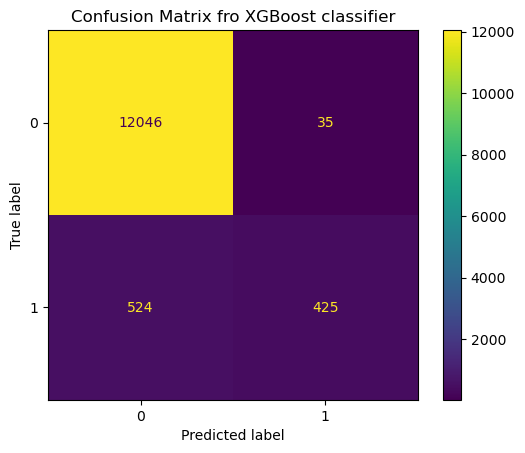

In [110]:
ConfusionMatrixDisplay.from_estimator(best_xgb,xTest,yTest)
plt.title('Confusion Matrix fro XGBoost classifier')
plt.show()

# ROC AUC Curve

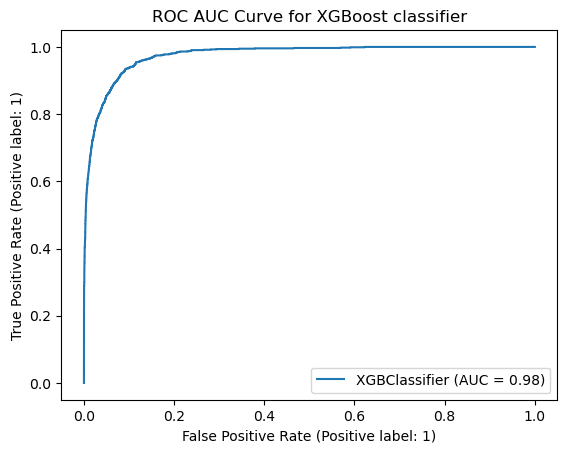

In [113]:
RocCurveDisplay.from_estimator(best_xgb,xTest,yTest)
plt.title('ROC AUC Curve for XGBoost classifier')
plt.show()

# Precision Curve 

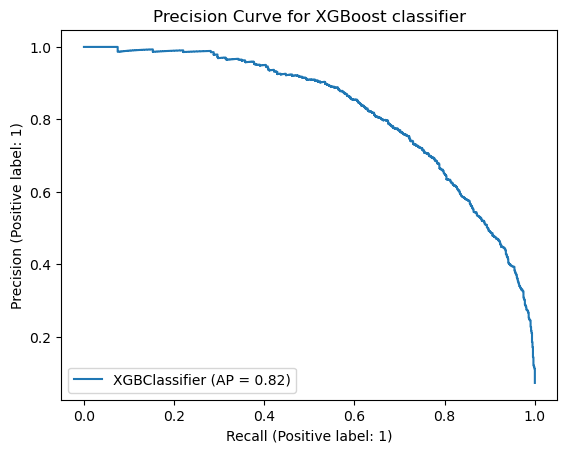

In [115]:
PrecisionRecallDisplay.from_estimator(best_xgb,xTest,yTest)
plt.title('Precision Curve for XGBoost classifier')
plt.show()